In [9]:
import pandas as pd
import numpy as np
import pickle

In [10]:
path = f'runs/'
i = 9
with open(path+f'results_array_{i}.pkl', 'rb') as f:
    results_array = pickle.load(f)

In [27]:
summary = results_array[0].summary2()

summary.tables[1].loc['const']

Coef.       -4.110809e+00
Std.Err.     1.136023e-01
z           -3.618597e+01
P>|z|       1.012133e-286
[0.025      -4.333466e+00
0.975]      -3.888153e+00
Name: const, dtype: float64

-4.110809305009398
-4.1181926392570345
-4.1317452180354675
-4.125218261535285
-4.1093719393434975
-4.1037677690357
-4.10560749456552
-4.131144787358922
-4.105991101399903
-4.099043452766682


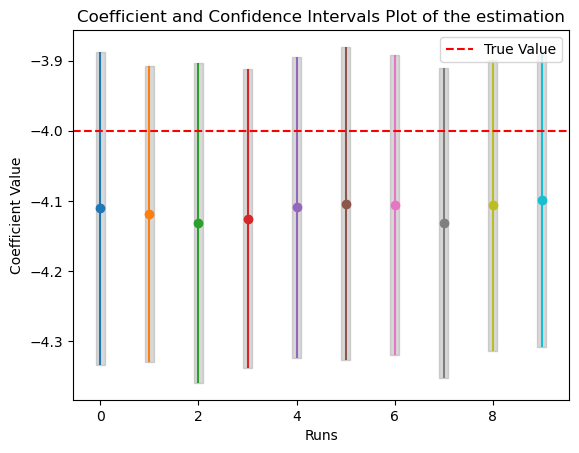

In [42]:
import matplotlib.pyplot as plt

# Assume results_array is your list of Pandas Series
fig, ax = plt.subplots()

# Extract and plot each series
for i, summary in enumerate(results_array):
    result = summary.summary2().tables[1].loc['const']
    coef = result.loc['Coef.']
    lower_bound = result.loc['[0.025']
    upper_bound = result.loc['0.975]']
    print(coef)
    
    # Plotting the coefficient with error bars
    #ax.errorbar(i, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o', label=f'Series {i+1}')
    ax.errorbar(i, coef, yerr=[[coef - lower_bound], [upper_bound - coef]], fmt='o')
    
    # Optionally, fill between the confidence interval
    ax.fill_between([i-0.1, i+0.1], lower_bound, upper_bound, color='gray', alpha=0.3)

# Add horizontal line at -4
ax.axhline(y=-4, color='r', linestyle='--', label='True Value')

# Setting labels and title
ax.set_xlabel('Runs')
ax.set_ylabel('Coefficient Value')
ax.set_title('Coefficient and Confidence Intervals Plot of the estimation')

# Add legend
ax.legend()

# Show plot
plt.show()


In [19]:
summary = result_list[0].summary2()
constant_info = summary.tables[1].loc['const']

IndexError: list index out of range

In [5]:
#df = pd.DataFrame(params_list,columns=['sigma','alpha','beta'])
df = pd.DataFrame(results_array,columns=['sigma','alpha','beta'])

In [8]:
analysis = df.describe()
sigma = -4
print(f'true sigma={sigma}')
analysis

true sigma=-4


,sigma,alpha,beta
count,10.000000,10.000000,10.000000
mean,-4.119630,0.015698,0.016231
std,0.007570,0.000704,0.000727
min,-4.130701,0.014406,0.014917
25%,-4.124553,0.015320,0.015787
50%,-4.119658,0.015818,0.016159
75%,-4.116953,0.016005,0.016769
max,-4.103297,0.016964,0.017428
